# Handwritten digits classifier using neural network
Using only input and output layer to classify handwritten digits and later adding hidden layer to see performance improvements of the model.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-08-12 12:08:04.240809: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-12 12:08:04.252127: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-12 12:08:04.252145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
#X_train[0]

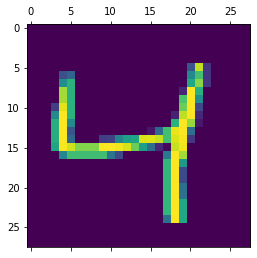

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

In [8]:
X_train = X_train / 255
X_test = X_test / 255

##### Flatten the array 

In [9]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [10]:
#X_train_flattened[0]

## Without hidden layers

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


2022-08-12 12:08:09.191283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-12 12:08:09.191308: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-12 12:08:09.191324: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arihant-dell): /proc/driver/nvidia/version does not exist
2022-08-12 12:08:09.191551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 2s 850us/step - loss: 0.4696 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 1s 711us/step - loss: 0.3036 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 1s 703us/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 739us/step - loss: 0.2729 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 1s 689us/step - loss: 0.2665 - accuracy: 0.9258


In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 577us/step - loss: 0.2686 - accuracy: 0.9257


[0.2686050236225128, 0.9257000088691711]

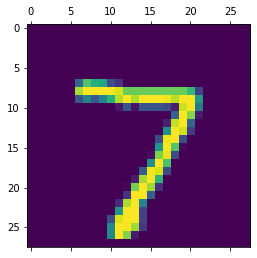

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 655us/step


array([2.6074413e-02, 2.3931560e-07, 7.8773171e-02, 9.5150304e-01,
       2.4836254e-03, 1.4852194e-01, 1.1394375e-06, 9.9980026e-01,
       8.7469563e-02, 5.7381475e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1105,    3,    2,    0,    2,    4,    2,   17,    0],
       [   6,    8,  923,   14,    8,    6,   13,    9,   42,    3],
       [   5,    0,   21,  901,    1,   40,    2,    8,   24,    8],
       [   2,    1,    4,    2,  920,    0,    9,    3,   11,   30],
       [   9,    2,    3,   16,    9,  801,   12,    4,   31,    5],
       [  13,    3,    6,    1,    8,   21,  900,    2,    4,    0],
       [   1,    5,   24,    7,    9,    1,    0,  948,    3,   30],
       [   7,    4,    5,   16,    9,   27,    8,   12,  881,    5],
       [  11,    6,    1,    9,   30,    8,    0,   23,    9,  912]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

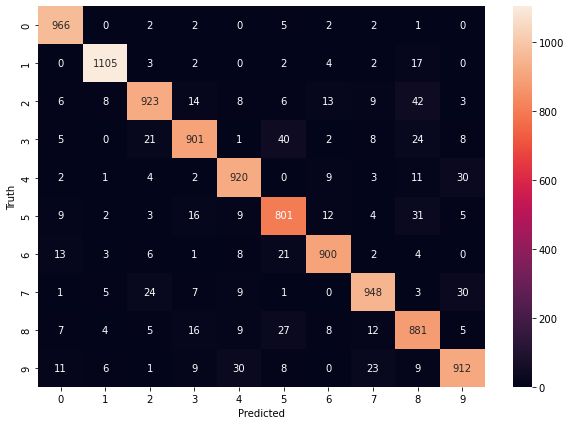

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1241 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0864 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0527 - accuracy: 0.9840


In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 774us/step - loss: 0.0796 - accuracy: 0.9746


[0.0795515775680542, 0.9746000170707703]

313/313 [==============================] - 0s 624us/step


Text(69.0, 0.5, 'Truth')

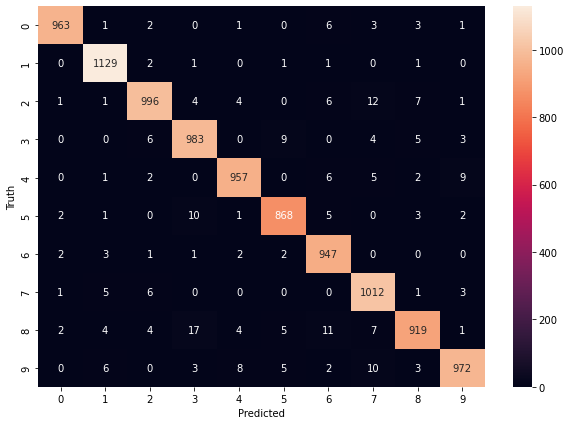

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using flatten layer to avoid calling .reshape on input dataset 

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1225 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0850 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0640 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0501 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0401 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0332 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0275 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 989us/step - loss: 0.0761 - accuracy: 0.9784


[0.07606162130832672, 0.9783999919891357]